# SNP counts barplot

### This notebook accompanies the paper "Illuminating Genetic Mysteries of the Dead Sea Scrolls"
#### Author: Moran Neuhof

The following notebook produces the figure as in Figure S5C.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from matplotlib.colors import LinearSegmentedColormap
from collections import defaultdict
%matplotlib inline

sns.set_context("paper")
# sns.set_style("whitegrid")
sns.set(style="white", palette="muted", color_codes=True)

In [13]:
# loading the tables
working_folder = 'new_snp_by_fragment'  # Enter working folder
SNP_filename = None  # Add SNP file name here
specimen_filename = os.path.join(working_folder, 'titles_w_outgroup_sheep.csv')  # file attached to notebook

In [3]:
# parsing and counting informative SNPs
num_SNPs = 0
d = defaultdict(list)
with open(SNP_filename, 'r') as infile:  # reading the file
    for line in infile:
        line_split = line.strip().split(',')  # splitting
        if line_split[0] == 'chr':  # saving the header
            header = line_split[2:]
        else:
            SNP_vals = line_split[2:]
            line_set = set(SNP_vals)
            line_set.discard('-') 
            if len(line_set) > 1:  # the line is approved
                num_SNPs += 1  # a valid SNP
                for i in range(len(SNP_vals)):
                    d[header[i]].append(SNP_vals[i])  # appending to list

In [7]:
# count SNPs
num_valid_SNPs = {fragment: num_SNPs - gap_num for fragment,gap_num in num_gaps_dict.items()}
# Turning the dict into dataframe
SNPs_df = pd.DataFrame.from_dict(num_valid_SNPs, orient='index').sort_index()
SNPs_df.columns = ['SNPs']

# sort values by their SNP number
sorted_SNPs_df = SNPs_df.sort_values('SNPs', ascending=False)

In [26]:
# parse specimen names file
with open(specimen_filename, 'r') as infile:
    d = {line_split[0]: line_split[1] for line_split in (line.strip().split(',') for line in infile)}

Plot figure (sorted barplot):

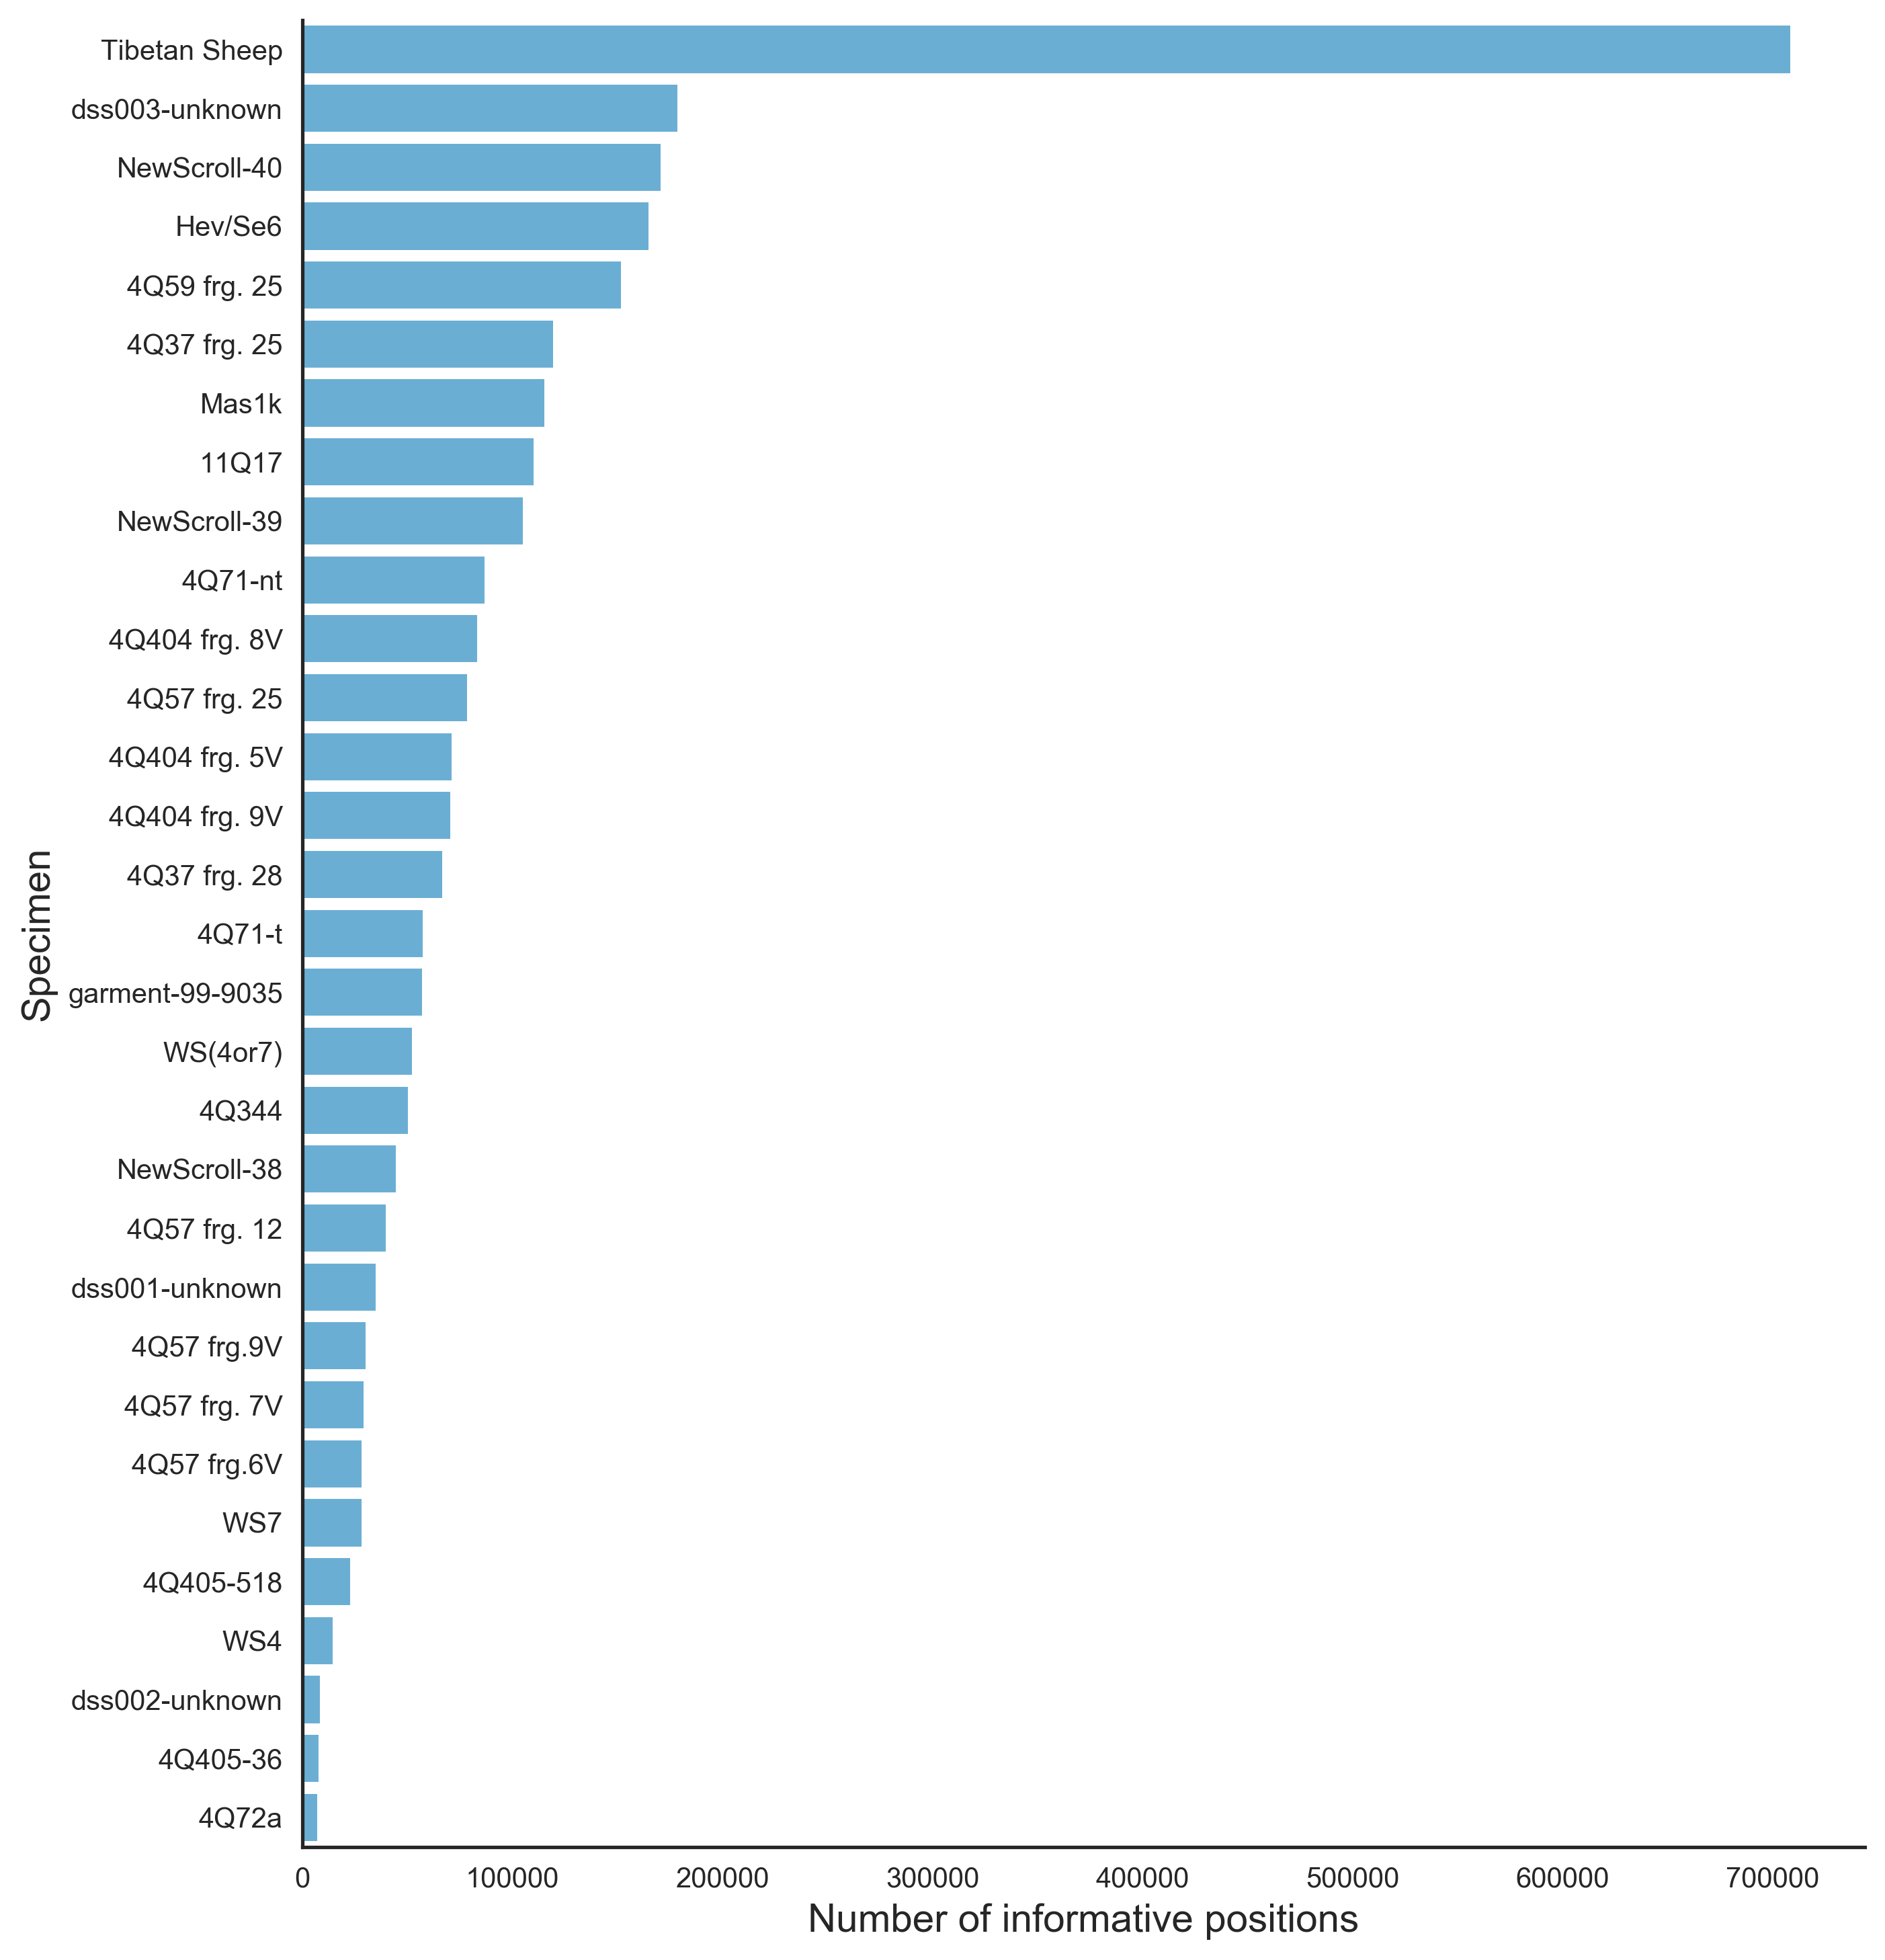

In [31]:
fig = plt.figure(figsize=(10,12), dpi=300)

sns.barplot(y=sorted_SNPs_df.index, x=sorted_SNPs_df.SNPs, color=(0.35, 0.7, 0.9))
plt.yticks(range(len(sorted_SNPs_df)), [d[x] for x in sorted_SNPs_df.index])
plt.ylabel('Specimen', fontsize=14)
plt.xlabel('Number of informative positions', fontsize=14)

sns.despine()
# plt.savefig(os.path.join(working_folder,'informative_positions_by_SNP_number_per_specimen.png'))  # if you want to save it
